# <center>Introduction on Using R to access GeoNet's Volcano Chemistry data

In this notebook we look at getting volcano chemistry data from a set area. This notebook has the functions needed to get data as well as some examples of how to use them. By the end of this tutorial you should be able to make a table like the one below for a set area <img src="sites.png">
Then be able to be data from both multiple sites <img src="Cl_data.png">
and when multiple methods are used.<img src="SO2flux.png">


## &nbsp; Table of contents

### 1. Introduction
### 2. Set Up 
### 3. Define Area of Interest
### 4. Get Site Data
### 5. Define Functions
#### &nbsp; 5.1 Get Volcano Data
#### &nbsp; 5.2 Get Methods Used
#### &nbsp; 5.3 Get Volcano Data with Method
### 6. Chlorine Example
#### &nbsp; 6.1 Get Cl Data for Ruapehu
#### &nbsp; 6.2 Save Cl Data for Ruapehu
#### &nbsp; 6.3 Trim Cl Data for Ruapehu
### 7. Sulphur Dioxide Flux Example
#### &nbsp; 7.1 Get SO2 Flux Data for Ruapehu
#### &nbsp; 7.2 Get Methods Used for SO2 Flux for Ruapehu
#### &nbsp; 7.3 Get SO2 Flux Data with methods for Ruapehu
#### &nbsp; 7.4 Plot SO2 Flux with Methods

## &nbsp; 1. Introduction

In this tutorial we will be learning how to use R to access GeoNet's Volcano data. GeoNet has a API (Application Programming Interface) to access Volcano data. You do not need to know anything about APIs to use this tutorial but if you would like more info see https://fits.geonet.org.nz/api-docs/.

R is a language made for statisticians by statisticians. It is an open source language which anyone can make a package for. This means that R has a lot of useful functions for all kinds of research.

This tutorial assumes that you have basic knowledge of the language R, but basic knowledge of any programming language should be sufficient to follow this tutorial.

All data will be saved into R as a data frame which is much like, what would be called, a dictionary in other languages, but with a few more restrictions to the data structure. To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame

We will also be using the packages geojsonR (https://cran.r-project.org/web/packages/geojsonR/geojsonR.pdf )

###### About GeoNet Volcano Chemistry data

GeoNet uses many methods to monitor volcanic activity in and around NZ. One of the methods they use is to take gas and water samples. <br>
This chemistry data, dating back to the 1950’s, can be accessed using GeoNet’s API. 
The types of data and frequency of collection changes from site to site, but a full list of all types of data collected can be found at (git hub link), or at http://fits.geonet.org.nz/type (for best formatting use firefox)

For an overview on how GeoNet monitors volcanic activity go to https://www.geonet.org.nz/volcano/how

## &nbsp; 2. Set Up 

###### Install Packages

In [ ]:
install.packages("geojsonR")

Note this code might take some time to run but you only need to run this ONCE.


###### Call libraries

In [2]:
library(httr)
library(geojsonR)

The library httr (https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html) is a base package of R and will not need to be imported. To find out more about geojsonR go to(https://cran.r-project.org/web/packages/geojsonR/geojsonR.pdf )

## &nbsp; 3. Define Area of Interest

You can define you area of interest in the shape of any polygon. In this example we will be looking at a square as our polygon. 

###### Define the longitude and latitude of the point of interest

In [3]:
point_long <- 175.565
point_lat <- -39.281
maxradius <- 0.1

Define the longitude and latitude of the point of interest as well as how far out from that point you want to look (`maxradius`) in . e.g Here the point of insterset is Ruapehu and we have made a small box as to not get Tongariro in this box

###### Set parameters for area of interest.

In [4]:
long_max<- point_long + maxradius
long_min<- point_long - maxradius
lat_max <- point_lat - maxradius
lat_min <- point_lat + maxradius

This set the 4 edge points of the box we will look for GNSS sites in.

###### Make box

In [5]:
ploy <- paste(long_max,"+",lat_max
              ,",",long_max,"+",lat_min
              ,",",long_min,"+",lat_min
              ,",",long_min,"+",lat_max
              ,",",long_max,"+",lat_max, sep="")

Here we use the points worked out before to make a box that is formatted in the right way to put into our URL later

## &nbsp; 4. Get Site Data

###### Set URL

In [6]:
base_url <- "http://fits.geonet.org.nz/"
endpoint <- "site"

The base URL should be set as above, and the endpoint is set to site to get the site data. There are other endpoints which will return different information such as plot and observation. To learn more go to https://fits.geonet.org.nz/api-docs/.

###### Combine information to get full URL

In [7]:
full_url <- paste(base_url,endpoint,"?within=POLYGON((", ploy, "))", sep="")

In [8]:
full_url

[1] "http://fits.geonet.org.nz/site?within=POLYGON((175.665+-39.381,175.665+-39.181,175.465+-39.181,175.465+-39.381,175.665+-39.381))"

Combine the information to make the full URL. sep="" make sure there is no space between each piece of information. In this case you get the URL 'http://fits.geonet.org.nz/site?within=POLYGON((175.665+-39.381,175.665+-39.181,175.465+-39.181,175.465+-39.381,175.665+-39.381)) 

###### Get sites

In [9]:
allsites <- FROM_GeoJson(full_url)[[1]]

Use `FROM_GeoJson` to get all the sites using the above URL. `[[1]]` is saying only look at the 1st row of data and is needed becuase all data is in the 1st row with this row saying that it is site data. `FROM_GeoJson` will also translate the data into a datafram as the the data at the URL is in a format called JSON(JavaScript Object Notation) or more specifically GeoJSON(Geographical JavaScript Object Notation) http://geojson.org/

###### See the number of sites

In [10]:
paste("There are" , length(allsites), "sites in the the box of interest")

[1] "There are 16 sites in the the box of interest"

We only want to know the site ID, name and longitude and latitude of each site so I will make a new data frame will only this information in it.

###### Initialize this data frame

In [11]:
ruapehu <- data.frame("siteID"= allsites[[1]]$properties$siteID,
                      
                "longitude" =allsites[[1]]$geometry$coordinate[1], 
                "latitude" =allsites[[1]]$geometry$coordinate[2],    
                "hight" = allsites[[1]]$properties$height,
                      
                "name"= allsites[[1]]$properties$name)

Take the first `[[1]]` data point and extract the values for siteID, longitude and latitude. Then format this into a data frame

###### Complete this data frame

In [12]:
for (i in 2:length(allsites)){
    
    temp <- data.frame("siteID"=allsites[[i]]$properties$siteID, 
                       
                      "longitude" =allsites[[i]]$geometry$coordinate[1], 
                      "latitude" =allsites[[i]]$geometry$coordinate[2],
                       "hight" = allsites[[i]]$properties$height,
                       
                      "name"= allsites[[i]]$properties$name)
    
    ruapehu <- rbind(ruapehu, temp)
}

Do what was done for the first data point for each data point adding it to the data frame with `rbind`.

###### Print out this data frame

In [13]:
ruapehu

siteID,longitude,latitude,hight,name
RU002,175.5644,-39.28128,2529.000,"Ruapehu Crater Lake, Whole Lake"
VGDR,175.5634,-39.27527,2691.957,Dome
RU001,175.5654,-39.28350,2529.000,Ruapehu Crater Lake Outlet
RU000,175.5644,-39.28128,2529.000,Ruapehu Volcano
RU003,175.5650,-39.28160,2529.000,Ruapehu Crater Lake Central Vent
RU010,175.5422,-39.19984,1161.000,Chateau Observatory
TO051,175.6042,-39.20069,1230.000,"Tongariro, Lower Tama Lake"
RU020,175.5280,-39.22493,1280.000,"Ruapehu, Silica Rapids"
RU001A,175.5654,-39.28350,2529.000,Ruapehu Crater Lake Outlet
RU004,175.5649,-39.27980,2529.000,Ruapehu Crater Lake North Vent


Volcano sites are set up with site ID a set format. The first 2 letter are for the volcano eg. "RU" for Ruapehu. Then 3 number eg. "RU002" is the whole crater lake on Ruapehu. The site with other formatting are more likely to be GNSS sites.

###### Save site information

In [14]:
 write.csv(ruapehu, "ruapehu_sites.csv")

This will save a csv called ruapehu_sites in the folder this code is run from. 

## &nbsp; 5. Define Functions

When we want to run code many times it is best to write it as a function. A function is a block of code that can be called later in the code with just one line of code. A function should take a set number of inputs and return some output. In R we have to define the functions before we call them. (unlike Python)

###  &nbsp; 5.1 Get Volcano Data

In [15]:
get_volcano_data <- function(site,type){
    # This function takes a site ID and type ID as a strings
    # and returns a dataframe with all the observation of that type for that site
    
    #Set up
    base_url <- "http://fits.geonet.org.nz/"
    endpoint <- "observation"
    
    #Get data
    full_url <- paste(base_url,endpoint,"?typeID=",type,"&siteID=",site, sep="")
    request <- GET(full_url)
    
    #Unpack data into data frame
    data <- content(request, encoding ="UTF-8")
    
    #Test if there is data in that data frame. 
    #If  there is then the data is retuned
    if (nrow(data)>0){
        return (data)
    }
    #else this fuction will return nothing 
}

The function `get_volcano_data` takes a site ID and type ID and ruturns dataframe with all the observation if there is observation data, else it will just return nothing. This works much the same as the function in the https://github.com/JenLowe/data_tutorials/blob/master/GNSS_Data/R/Introduction_to_GNSS_data_using_FITS_in_R.ipynb notebook to get GNSS data. More on how each line is working can be found in this notebook.

### &nbsp; 5.2 Get Methods

###### Make a function to make method data into a data frame

In [16]:
make_method_df<- function(data){
    #This function takes method data as a list
    #and returns a dataframe with all the method data.
    
    #Initialize this data frame
    df <- data.frame("methodID" = data[[1]]$methodID,
                     "name "= data[[1]]$name,
                     "description" = data[[1]]$description,
                     "reference" = data[[1]]$reference)
    
    #If the data has more then one data point 
    if (length(data)>1){
        #Complete this data frame
        for (i in 2:(length(data))){
            temp <- data.frame("methodID" = data[[i]]$methodID,
                               "name "= data[[i]]$name,
                               "description" = data[[i]]$description,
                               "reference" = data[[i]]$reference)
            df <- rbind(df, temp)
        }
    }
    
    #Return this data frame
    return(df)

}

The function `make_method_df` makes a data frame from list data, like for the site data. It takes method data as a list and returns a dataframe with all the method data. This funtion will need to be called befor `get_method`

###### Make a function to get method data

In [17]:
get_method<- function(type){
    # This function takes a type ID as a strings
    # and returns all methods used for this type
    
    #Set up
    base_url <- "http://fits.geonet.org.nz/"
    endpoint <- "method"
    
    #Get Data
    full_url <- paste(base_url,endpoint,"?typeID=",type, sep="")
    request <- GET(full_url)
    
    #Unpack data
    data <- content(request)[[1]]
    
    #Make data into a data frame using above function
    df <- make_method_df(data)
    
    #Return the data frame
    return (df)
}

The function `get_method` takes a type ID and returns all methods used for this type. This function use the above function `make_method_df`. 

### &nbsp; 5.3 Get Volcano Data with Method

In [18]:
get_volcano_data_with_method <- function(site,type,method){
    # This function takes a site ID, type ID and method ID as a strings
    # and returns a dataframe with all the observation of that type for that site
    
    #Set up 
    base_url <- "http://fits.geonet.org.nz/"
    endpoint <- "observation"
    
    #Get Data
    full_url <- paste(base_url,endpoint,"?typeID=",type,"&siteID=",site,"&methodID=", method, sep="")
    request <- GET(full_url)
    
    #Unpack data
    data <- content(request, encoding ="UTF-8")
    
    #Test if there is data in that data frame. 
    #If  there is then the data is retuned
    if (nrow(data)>0){
        return (data)
    }
    #else this fuction will return nothing
}

The function `get_volcano_data_with_method` works much like `get_volcano_data but` also takes a method ID and returns data taken with that method

## &nbsp; 6. Chlorine Example

In this example we look at geting data about the Chlorine levels in the water of Ruapehu's Crater Lake. We look at geting all the data the GeoNet has then triming this data to look at only a set time. 

You can find a list of type ID at (git hub link), or at http://fits.geonet.org.nz/type (for best formatting use firefox) but most of the type ID are in the format (chemical formula)-(g/w) where g is for gas and w is for water. e.g. Cl-w is for Chlorine in water. 

###### Set the type to the type ID for Chlorine in water.

In [19]:
type <- "Cl-w"

### &nbsp; 6.1 Get Cl Data for Ruapehu

###### Get data for all site found in part 4 of this notebook 

In [ ]:
#Initialize a list to put the data in later
Cl <- list()
#loop over each site ID that we found in part 4 of this notebook 
for (i in 1:nrow(ruapehu)){ 
    #get the siteID out of the ruapehu data frame and make sure it is a string
    site<- toString(ruapehu$siteID[[i]])
    # use the get_volcano_data funtion to get the data and save it with the key of the site's ID
    Cl[[site]]<- get_volcano_data(site,type)
    }

The above code loops over the siteIDs and and runs `get_volcano_data` so that if it there is data for that site then it is saves into `Cl` with the "key" as the siteID 

###### Print some information about the data

In [21]:
for (i in 1:length(Cl)){
    print (paste(names(Cl)[i],"has",
                 nrow((Cl)[[i]]), "data points from", 
                 min(Cl[[i]]$'date-time'), "to",
                 max(Cl[[i]]$'date-time')))
    }

[1] "RU001 has 493 data points from 1954-01-22 to 2018-12-18"
[1] "RU003 has 158 data points from 1998-03-17 to 2018-12-18"
[1] "TO051 has 26 data points from 1981-12-06 to 2018-05-10"
[1] "RU020 has 23 data points from 1990-03-18 to 2018-05-30"
[1] "RU004 has 66 data points from 1991-01-13 to 2018-12-18"


The above code loops over the list `Cl` and for each item prints its name (siteID), number of data points and the maximum and minimum dates for that site. 

### &nbsp; 6.2 Save Cl Data for Ruapehu

In [22]:
for (i in 1:length(Cl)){
    write.csv(Cl[[i]], paste(names(Cl)[i], "Cl_in_ruapehu.csv"))
    }

This `for` loop make a cvs file for each site. The csv will be named after the site ID. eg. The csv with the data from RU001 with be named RU001_Cl_in_ruapehu.csv

### &nbsp; 6.3 Trim Cl Data for Ruapehu

Sometime we only want to look at the data for a small window of time. To do this we can trim the data. 

###### Set the dates you want to look between

In [23]:
start<- as.POSIXct("2018-01-01")
end<- as.POSIXct("2019-01-01")

`as.POSIXct` makes sure that the dates are in the right format. Here we are looking for all data in the year 2018

###### Trim data

In [24]:
for (i in 1:length(Cl)){
    to_keep <- (start < Cl[[i]]$'date-time' & end > Cl[[i]]$'date-time' )
    Cl[[i]]<- Cl[[i]][to_keep,]
}

The above code loops over each sites data, and works out what rows of data the date is betwen the start and end date. It then save just these rows back to the list `Cl`

###### Print data

In [25]:
Cl

date-time,Cl-w (mg/L),error (mg/L)
2018-02-23,5764,0
2018-03-26,5618,0
2018-06-10,5548,0
2018-12-18,5924,0
date-time,Cl-w (mg/L),error (mg/L)
2018-02-23 00:00:00,5531,0
2018-03-26 00:00:00,5648,0
2018-05-10 00:00:00,5568,0
2018-06-10 00:00:00,5526,0
2018-06-10 00:15:00,5507,0


## &nbsp; 7. Sulphur Dioxide Flux Example

In this example we look at geting data about SO2 flux above Ruapehu. GeoNet uses mutiple methods to get gases from above volcanos so we look at the methods used and find what method was used for each sample

###### Set the type to be the ID of Sulphur Dioxide Flux in air. 

In [26]:
type <- "SO2-flux-a"

### &nbsp; 7.1 Get SO2 Flux Data for Ruapehu

In [ ]:
#Initialize a list to put the data in later
SO2_flux <- list()
#loop over each site ID that we found in part 4 of this notebook 
for (i in 1:nrow(ruapehu)){
    #get the siteID out of the ruapehu data frame and make sure it is a string
    site<- toString(ruapehu$siteID[[i]])
    #use the get_volcano_data funtion to get the data and save it with the key of the site's ID
    SO2_flux[[site]]<- get_volcano_data(site,type)
    }

The above code loops over the siteIDs and and runs `get_volcano_data` so that if it there is data for that site then it is saves into `SO2_flux` with the "key" as the siteID 

###### Print some information about the data

In [28]:
for (i in 1:length(SO2_flux)){
    print (paste(names(SO2_flux)[i],"has",
                 nrow((SO2_flux)[[i]]), "data points from", 
                 min(SO2_flux[[i]]$'date-time'), "to",
                 max(SO2_flux[[i]]$'date-time')))
    }

[1] "RU000 has 228 data points from 2003-05-27 to 2018-11-23"


The above code loops over the list `SO2_flux` and for each item prints its name (siteID), number of data points and the maximum and minimum dates for that site. 

### &nbsp; 7.2 Get Methods Used for SO2 Flux for Ruapehu

###### Get the methods for this type ID

In [29]:
methods<- get_method(type)

The code above runs the `get_method` funtion.

###### Print method data

In [30]:
methods

methodID,name.,description,reference
cont,contouring,"aircraft flies through a plume at different altitudes, a pump inside the aircraft sucks in gases and instruments measure the concentration",http://info.geonet.org.nz/display/volc/Gas
cosp,cospec,"correlation spectrometer measures absorption of ultraviolet light by SO2, flying beneath a plume",http://info.geonet.org.nz/display/volc/Gas
flsp,flyspec,"miniaturized UV spectrometer system measures absorption of ultraviolet light by SO2, flying beneath a plume","http://info.geonet.org.nz/display/volc/Gas, http://www.flyspec-inc.com/"
sflsp,scanning-flyspec,miniaturized UV spectrometer system measures absorption of ultraviolet light by SO2. Stationary ground-based system scanning from horizon to horizon,
mdoas-ah,mini-doas assumed plume height,"miniature differential optical absorption spectrometer, plume visible on only one scanner, plume height assumed",http://www.geo.mtu.edu/volcanoes/vc_web/tools/doas_1.html
mdoas-ch,mini-doas calculated plume height,"miniature differential optical absorption spectrometer, plume visible on more than one scanner, plume height calculated",http://www.geo.mtu.edu/volcanoes/vc_web/tools/doas_1.html


### &nbsp; 7.3 Get SO2 Flux Data with methods for Ruapehu

In [ ]:
#Initialize a list to put the data in later
SO2_flux_methods<-list()
#loop over each method
for (i in 1:nrow(methods)){
    #get the method ID out of the method data and make sure it is a string
    method<- toString(methods[i,]$"methodID")
    #use the get_volcano_data_with_method funtion to get the data and save it with the key of the method's ID
    SO2_flux_methods[[method]]<- get_volcano_data_with_method("RU000",type,method)
}

The above code loops over the methodIDs and and runs `get_volcano_data_with_method` so that if it there is data for that method then it is saves into `SO2_flux_methods` with the "key" as the method

###### Print some information about the data

In [32]:
for (i in 1:length(SO2_flux_methods)){
    print (paste(names(SO2_flux_methods)[i],"has",
                 nrow((SO2_flux_methods)[[i]]), "data points from", 
                 min(SO2_flux_methods[[i]]$'date-time'), "to",
                 max(SO2_flux_methods[[i]]$'date-time')))
    }

[1] "cont has 93 data points from 2004-04-21 to 2018-11-23"
[1] "cosp has 100 data points from 2003-05-27 to 2018-10-16"
[1] "flsp has 35 data points from 2008-08-11 to 2013-11-25"


The above code loops over the list `SO2_flux_methods` and for each item prints its name (methodID), number of data points and the maximum and minimum dates for that method

### &nbsp; 7.4  Plot SO2 Flux with Methods

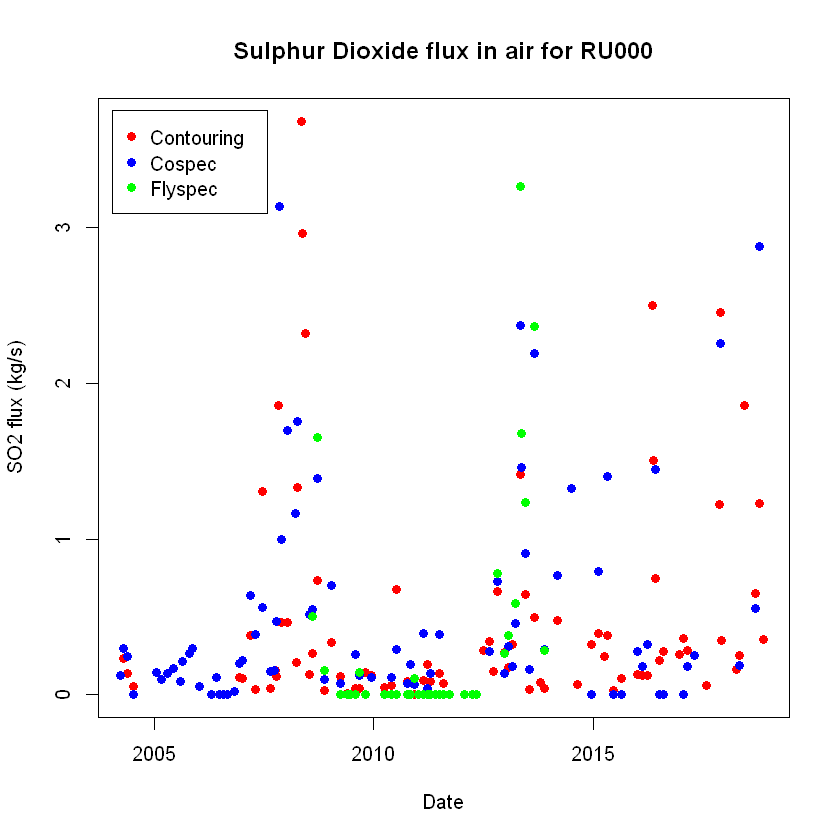

In [33]:
#make the title of the graph
title <- paste("Sulphur Dioxide flux in air for", names(SO2_flux)[1])

#make the plot with one set of data on it
plot(SO2_flux_methods[["cont"]]$'date-time', SO2_flux_methods[["cont"]]$'SO2-flux-a (kg/s)',
     main=title , xlab = "Date", ylab = "SO2 flux (kg/s)",pch = 16, col = "red")

#add the other 2 data sets to the plot 
points(SO2_flux_methods[["cosp"]]$'date-time', SO2_flux_methods[["cosp"]]$'SO2-flux-a (kg/s)',pch = 16, col = "blue")
points(SO2_flux_methods[["flsp"]]$'date-time', SO2_flux_methods[["flsp"]]$'SO2-flux-a (kg/s)',pch = 16, col = "green")

#add a key to the plot
legend("topleft",inset=.02, legend=c("Contouring", "Cospec", "Flyspec"),col=c("red", "blue", "green"),pch = 16, cex=1)

`SO2_flux_methods[["cont"]]` say call the dataframe with name "cont". We named each dataframe the same as it methodID, so this calls the data from the method "cont"<br>
The data `SO2_flux_methods[["cont"]]$'date-time'` is the date. This is set to be on the x axis. ` SO2_flux_methods[["cont"]]$'SO2-flux-a (kg/s)'` is the value messuered. This is set to be on the y axis. ` xlab = "Date", ylab = "SO2 flux (kg/s)"` give the graph its x and y axis titles. `pch  = 16` says that each data point will be put on the graph as a circle filled in point. `col = ` gives each point its color so each method can have a diffent color. 
`legend` adds a key to the graph. 
To save this plot right click on it in this notebook

## Useful links

<ul>
    <li>This notebook uses the language R https://www.r-project.org/
    <li>This notebook uses the library httr https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html
    <li>To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame
    <li>To understand the `get_volcano_data` function go to (right place in github)
    <li>To learn more about the packages geojsonR go to https://cran.r-project.org/web/packages/geojsonR/geojsonR.pdf  
    <li>More tutorials on volcano data can be found at (link to right place in github) 
    <li>For more on data types in FITS go to http://fits.geonet.org.nz/type (for best formatting use firefox)
    <li>For more on FITS go to https://fits.geonet.org.nz/api-docs/    
</ul>